# **Project Name :- Student's Placement Record Analysis**
- Project Type :- Data Science / Machine Learning
- Project Contributor :- Aditya Dhumal

# **Project Overview**
The Student’s Placement Record Analysis project is a Data Science–based exploratory study aimed at identifying the key factors that influence campus placement outcomes. By analyzing academic, technical, and skill-based attributes of students, the project provides actionable insights into what truly matters for securing placements.

Through detailed exploratory data analysis, the project seeks to uncover hidden patterns, trends, and relationships within the dataset that differentiate placed students from non-placed students. By quantifying the relative importance of each feature, the study helps in understanding which aspects of a student’s profile contribute most strongly to employability.

Ultimately, the objective is to provide meaningful, actionable insights that can guide students in prioritizing skill development and academic improvement throughout their educational journey. In addition, the project aims to support educational institutions and training programs by offering data-backed evidence that can be used to design more effective placement preparation strategies and career guidance initiatives.


## **Objective**
- Analyze which features (CGPA, internships, coding skills, communication skills, etc.) have the strongest influence on placement outcomes.
- Help students understand what really matters for getting placed.

# **Hypothesis**
- A student’s academic performance, technical skills, internships, aptitude, and soft skills significantly influence their campus placement status.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Loading

In [2]:
df=pd.read_csv("train.csv")

# Data Exploration

In [3]:
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [4]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')

In [5]:
df.shape

(45000, 15)

In [6]:
df.describe()

,Student_ID,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,24977.962600,20.999333,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133
std,14425.605704,1.995071,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954
min,1.000000,18.000000,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000
25%,12509.750000,19.000000,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000
50%,24957.500000,21.000000,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000
75%,37475.250000,23.000000,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000
max,50000.000000,24.000000,9.800000,3.000000,6.000000,10.000000,10.000000,100.000000,10.000000,3.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

In [8]:
df.isnull().sum()

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64

- Null values per column = 0
- Numerical fields [Internships, Projects, Coding_Skills, Communication_Skills, Aptitude_Test_Score, Soft_Skills_Rating, Certifications,Backlogs]
- Categorical fields [Age, Gender, Degree, Branch, CGPA]
- Target field [Placement_Status]

In [9]:
# Checking duplicae rows 
df[df.duplicated()]

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status


**No duplicate values hence the dataset contains all unique student information**

### Dataset information
- Student_ID - Unique identifiers for each student (4500 students)
- Age - Student's Age
- Gender - Gender of each student (Male/Female)
- Degree - Type of degree student is pursuing or completed (Eg: B.E/B.Tech)
- Branch - Specialization in field
- CGPA - Average CGPA of each student throught academic journey
- Internships - Number of internships student has completed as a fresher
- Projects - Number of projects students has built in their career journey
- Coding_Skills - Coding skills on a scale of 1-10 (1='Poor' , 10='Skilled')
- Communication_Skills - Communication skills of each student on a scale of 1-10 (1='Poor', 10='Excellent')
- Aptitude_Test_Score - Apptitude test score of each individual (out of 100)
- Soft_Skills_Rating - Soft skills ratings of each students (1-10)
- Certifications - No of certifications each student has completed 
- Backlogs - No of backlogs each student has. 
- Placement_Status - Actual target column contains value if student has placed or not 

# <center> **Exploratory Data Analysis (EDA)** </center>

In [10]:
#Seperating truly numerical features and categorical features 
Num_features = df.describe().drop(columns=['Student_ID','Age']).columns.values
Cat_features=df.drop(columns=Num_features).columns.values

In [11]:
Cat_features

array(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch',
       'Placement_Status'], dtype=object)

In [12]:
Num_features=df.columns.drop(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch',
       'Placement_Status'])

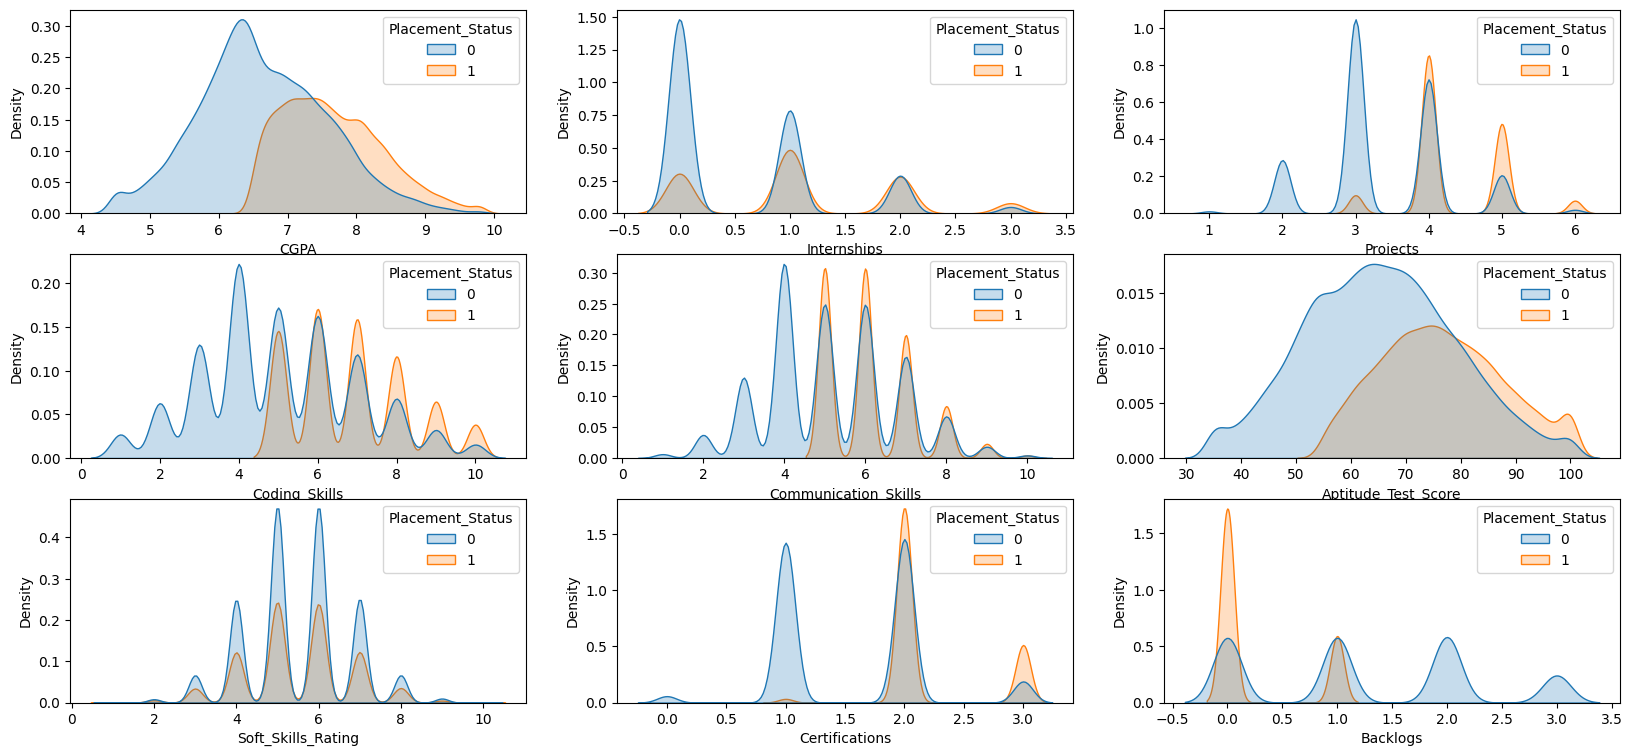

In [45]:
plt.figure(figsize=(20,9))
for i in range(0,len(Num_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[Num_features[i]],fill=True,hue=df['Placement_Status'])

- **Students with CGPA more than 7.5 approx have higher chance of getting placed**
- **Students with more than 1 internship have higher chance of getting placed**
- **Students have to build atleast 4 projects to get placed**
- **Students with more than 6 out of 10 score in coding skills have higher chance of getting placed**
- **Students with more than 5 out of 10 rating in communication skills are getting placed**
- **Atleast 80% + scorer students in aptitude are getting placed**
- **Soft Skills are not impacting placemets at all**
- **Students needs atleast 2 certifications for getting placements**
- **Students with 0 backlogs are getting placed**

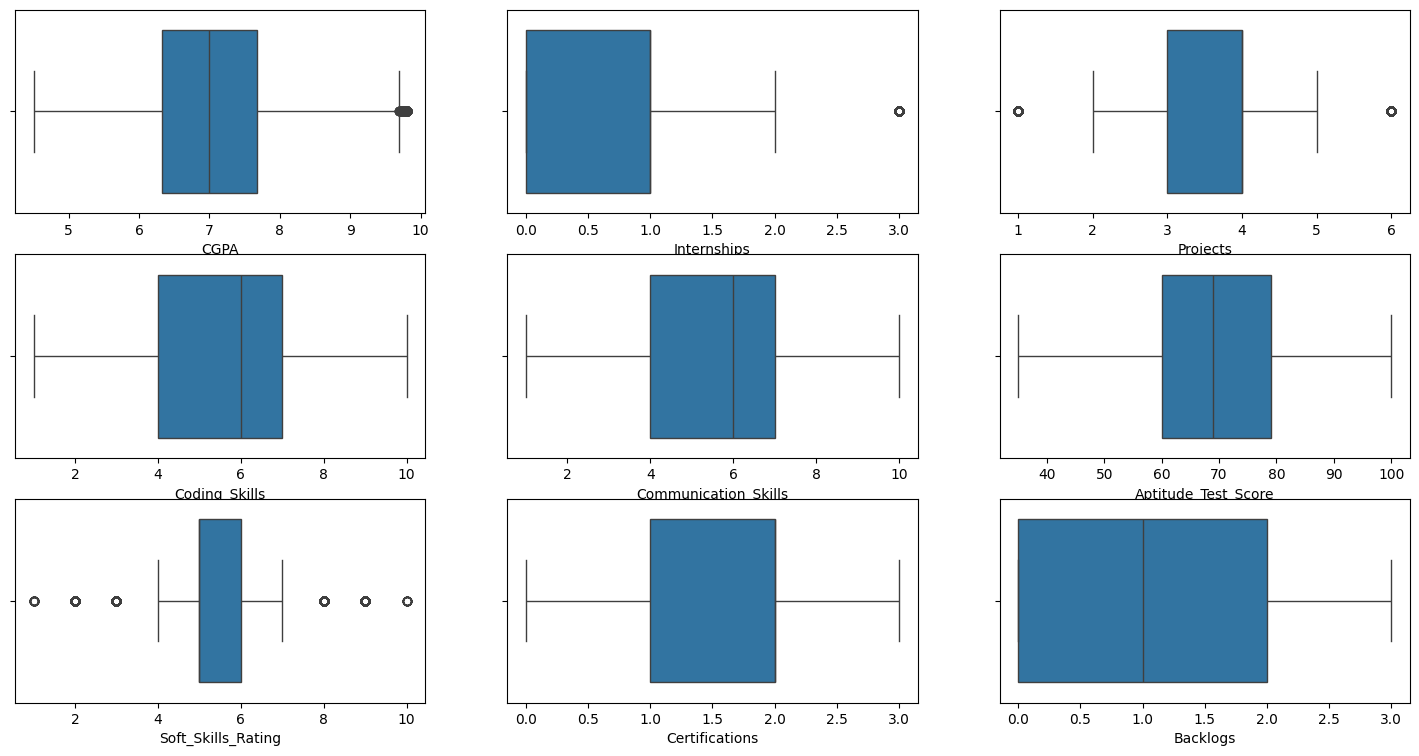

In [14]:
plt.figure(figsize=(18,9))
for i in range(0,len(Num_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[Num_features[i]])

In [15]:
Num_features

Index(['CGPA', 'Internships', 'Projects', 'Coding_Skills',
       'Communication_Skills', 'Aptitude_Test_Score', 'Soft_Skills_Rating',
       'Certifications', 'Backlogs'],
      dtype='object')

In [16]:
df

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,9362,20,Male,MCA,Civil,7.84,2,5,9,7,68,6,3,1,Placed
44996,8940,19,Female,B.Sc,ME,8.28,1,4,6,5,74,5,2,0,Placed
44997,13097,20,Female,B.Sc,Civil,8.88,0,4,4,5,83,4,2,0,Not Placed
44998,12958,24,Female,MCA,ECE,5.90,1,3,6,6,60,2,2,1,Not Placed


In [17]:
Cat_features=df.columns.drop(['CGPA', 'Internships', 'Projects', 'Coding_Skills',
       'Communication_Skills', 'Aptitude_Test_Score', 'Soft_Skills_Rating',
       'Certifications', 'Backlogs','Student_ID','Placement_Status'])

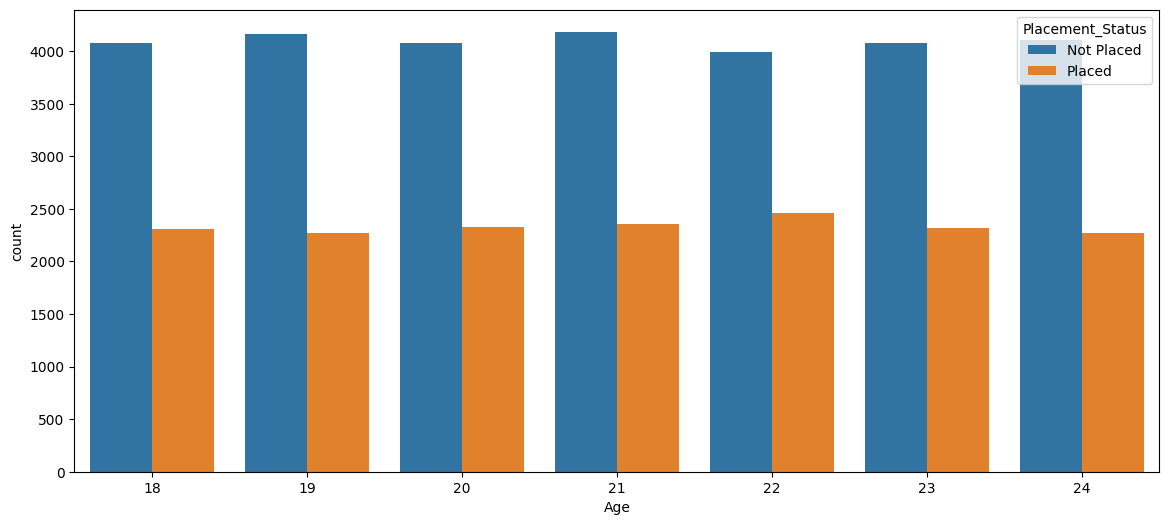

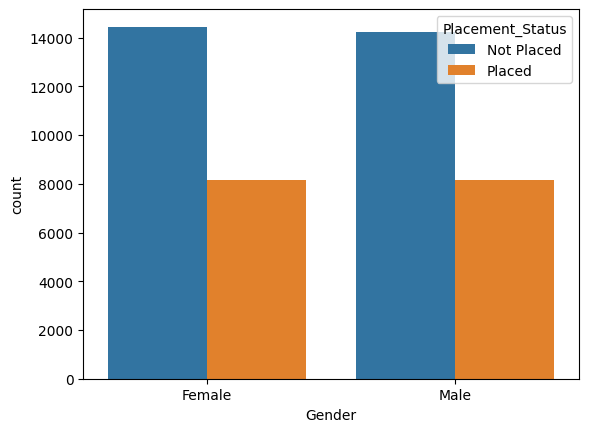

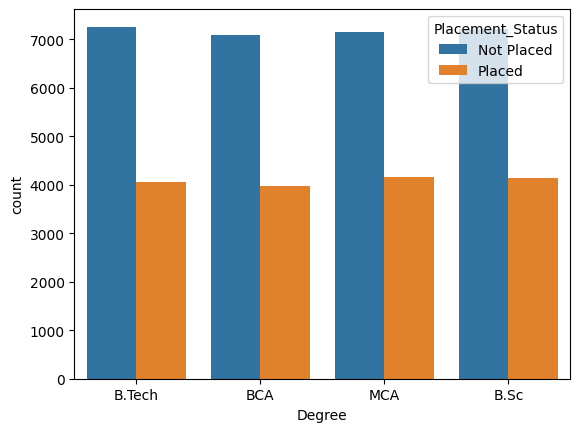

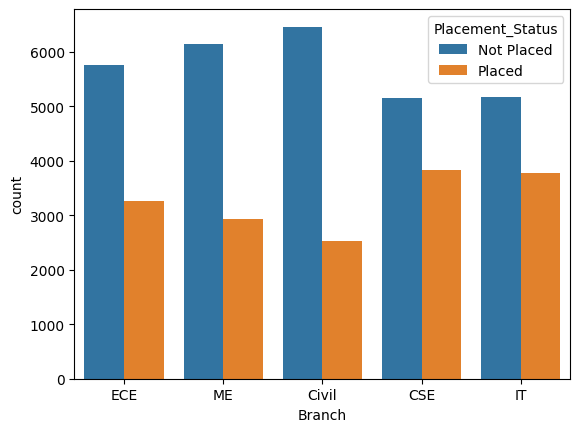

In [18]:
plt.figure(figsize=(14,6))
for i in range(0, len(Cat_features)):
  # plt.subplot(2,2,i+1)
  sns.countplot(x=df[Cat_features[i]],hue=df['Placement_Status'])
  plt.show()

- **Categorical features have no major impact on placements**
- **Students with civil branch are struggling to get placed**

([<matplotlib.patches.Wedge at 0x18ba9a35fd0>,
 [Text(-0.4605608223312712, 0.9989413040482126, 'Not Placed'),
  Text(0.4605606714953255, -0.9989413735909506, 'Placed')],
 [Text(-0.25121499399887515, 0.5448770749353886, '63.75'),
  Text(0.25121491172472293, -0.5448771128677912, '36.25')])

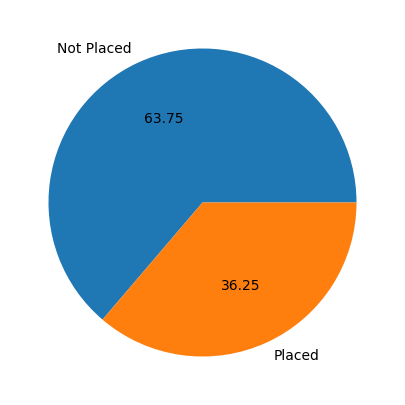

In [19]:
plt.figure(figsize=(18,5))
plt.pie(df['Placement_Status'].value_counts(),labels=['Not Placed','Placed'],autopct="%0.2f")

#### <b>Data is slightly imbalanced</b>

In [20]:
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


# <center>**DATA PREPROCESSING**</center>

### Feature Encoding

In [21]:
df

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,9362,20,Male,MCA,Civil,7.84,2,5,9,7,68,6,3,1,Placed
44996,8940,19,Female,B.Sc,ME,8.28,1,4,6,5,74,5,2,0,Placed
44997,13097,20,Female,B.Sc,Civil,8.88,0,4,4,5,83,4,2,0,Not Placed
44998,12958,24,Female,MCA,ECE,5.90,1,3,6,6,60,2,2,1,Not Placed


In [22]:
df=df.drop(columns=['Student_ID'])

In [23]:
df['Gender']=df['Gender'].replace({'Female':1,'Male':0}).astype(int)
df['Placement_Status']=df['Placement_Status'].replace({'Not Placed':0,'Placed':1})
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_11292\4158227448.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female':1,'Male':0}).astype(int)
C:\Users\Dell\AppData\Local\Temp\ipykernel_11292\4158227448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement_Status']=df['Placement_Status'].replace({'Not Placed':0,'Placed':1})


,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,22,1,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,0
1,20,1,BCA,ECE,6.05,1,4,6,8,59,8,2,1,0
2,22,0,MCA,ME,7.22,1,4,6,6,58,6,2,2,0
3,22,0,MCA,ME,7.78,2,4,6,6,90,4,2,0,1
4,20,1,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,20,0,MCA,Civil,7.84,2,5,9,7,68,6,3,1,1
44996,19,1,B.Sc,ME,8.28,1,4,6,5,74,5,2,0,1
44997,20,1,B.Sc,Civil,8.88,0,4,4,5,83,4,2,0,0
44998,24,1,MCA,ECE,5.90,1,3,6,6,60,2,2,1,0


In [50]:
X=df.drop('Placement_Status',axis=1)
Y=df['Placement_Status']


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=y)

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ['Degree', 'Branch']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)


In [66]:
x_train_enc = preprocessor.fit_transform(x_train)
x_test_enc = preprocessor.transform(x_test)


In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()

In [74]:
lr.fit(x_train_enc,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [77]:
y_pred=lr.predict(x_test_enc)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5738
           1       0.79      0.79      0.79      3262

    accuracy                           0.85      9000
   macro avg       0.84      0.84      0.84      9000
weighted avg       0.85      0.85      0.85      9000

